学习R语言SVM算法。

# 建立模型

In [ ]:
rm(list = ls())
data(iris)

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
library(e1071)

In [4]:
model <- svm(Species ~ ., data = iris, probability = T)

In [5]:
print(model)


Call:
svm(formula = Species ~ ., data = iris, probability = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51



In [6]:
summary(model)


Call:
svm(formula = Species ~ ., data = iris, probability = T)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




# 查看结果

In [7]:
model$index

[1]   9  14  16  21  23  24  26  42  51  53  54  55  57  58  60  61  64  67  69
[20]  71  73  77  78  79  84  85  86  87  88  99 107 109 111 117 119 120 122 124
[39] 126 127 128 130 132 134 135 138 139 143 147 149 150

In [9]:
x <- subset(iris, select = -Species)
y <- iris$Species

In [10]:
pred <- predict(model, newdata = x, probability = T)

In [11]:
head(pred)

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

In [ ]:
head(attr(pred, "probabilities"))

,setosa,versicolor,virginica
1,0.9797187,0.01175708,0.008524230
2,0.9720261,0.01880081,0.009173078
3,0.9783925,0.01240915,0.009198382
4,0.9741982,0.01592288,0.009878898
5,0.9788864,0.01211146,0.009002122
6,0.9732170,0.01745192,0.009331125


In [13]:
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [14]:
caret::confusionMatrix(pred, y)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

Overall Statistics
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9331, 0.9927)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.9600
Specificity                 1.0000            0.9800           0.9800
Pos Pred Value              1.0000            0.9600           0.9600
Neg Pred Value              1.0000            0.9800           0.9800
P

# 可视化决策边界

In [15]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


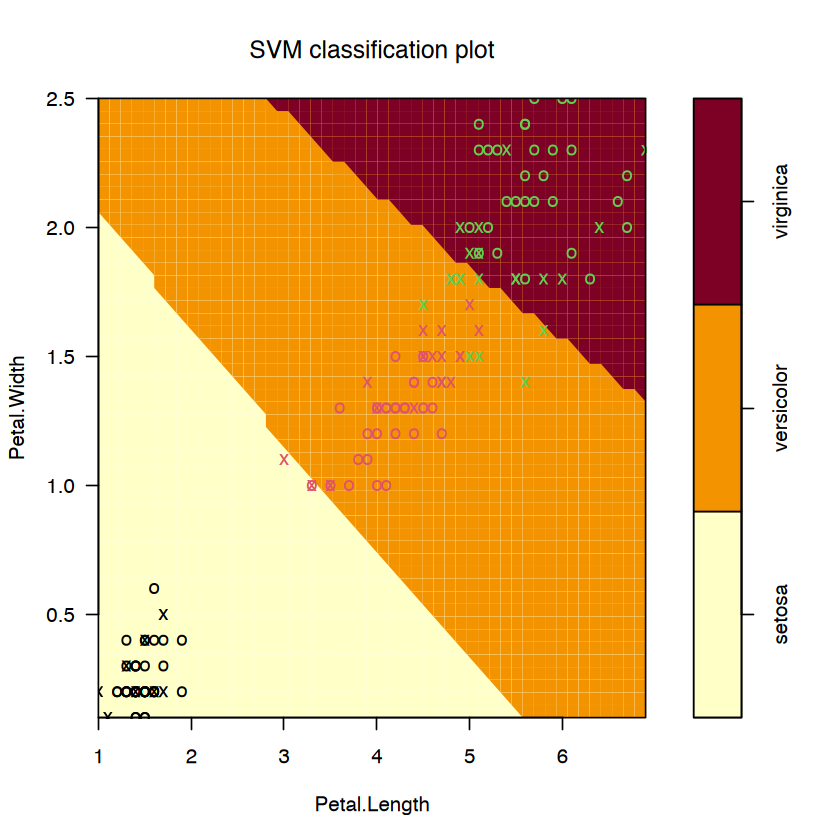

In [16]:
plot(
  model,
  data = iris,
  formula = Petal.Width ~ Petal.Length,
  slice = list(Sepal.Width = 3, Sepal.Length = 4),
  svSymbol = "x" # 支持向量的形状
)

# 不同核函数比较

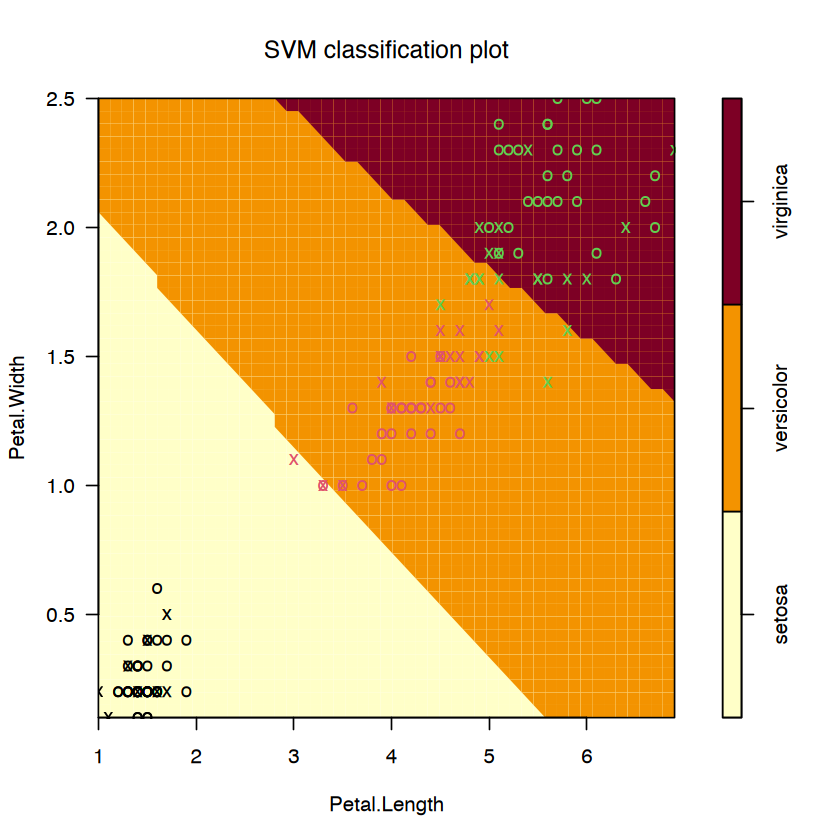

In [18]:
model_rbf <- svm(Species ~ ., data = iris, kernel = "radial")#径向基核
model_linear <- svm(Species ~ ., data = iris, kernel = "linear")#线性核
model_ploy <- svm(Species ~ ., data = iris, kernel = "polynomial")#多项式核
model_sig <- svm(Species ~ ., data = iris, kernel = "sigmoid")#sigmoid核

par(mfrow=c(2, 2))
plot(model_rbf, data = iris, formula = Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))

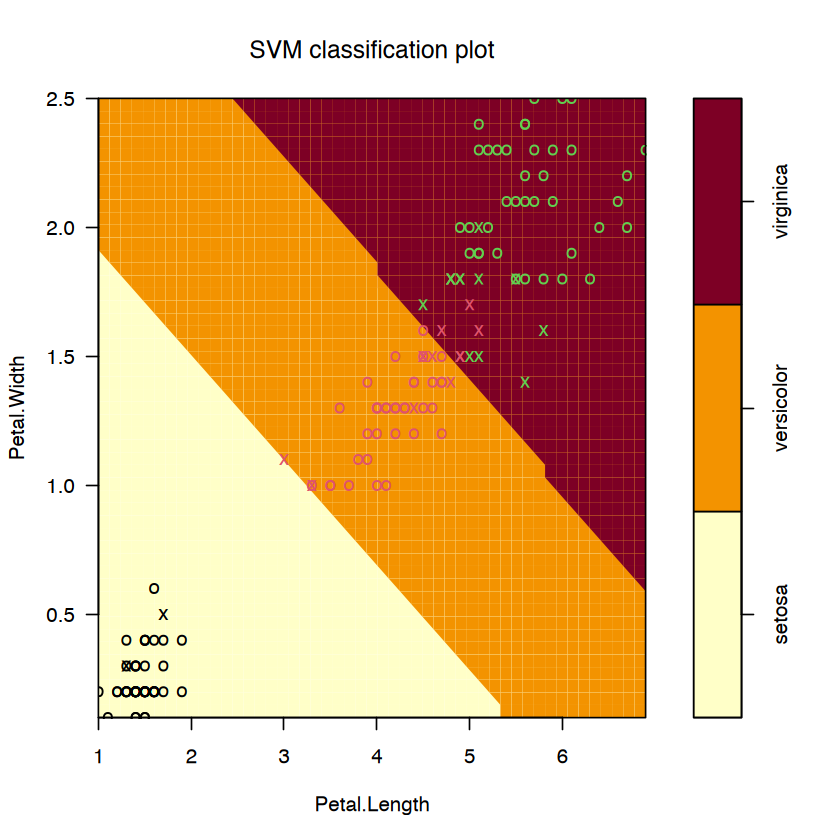

In [19]:
plot(model_linear, data = iris, formula = Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))

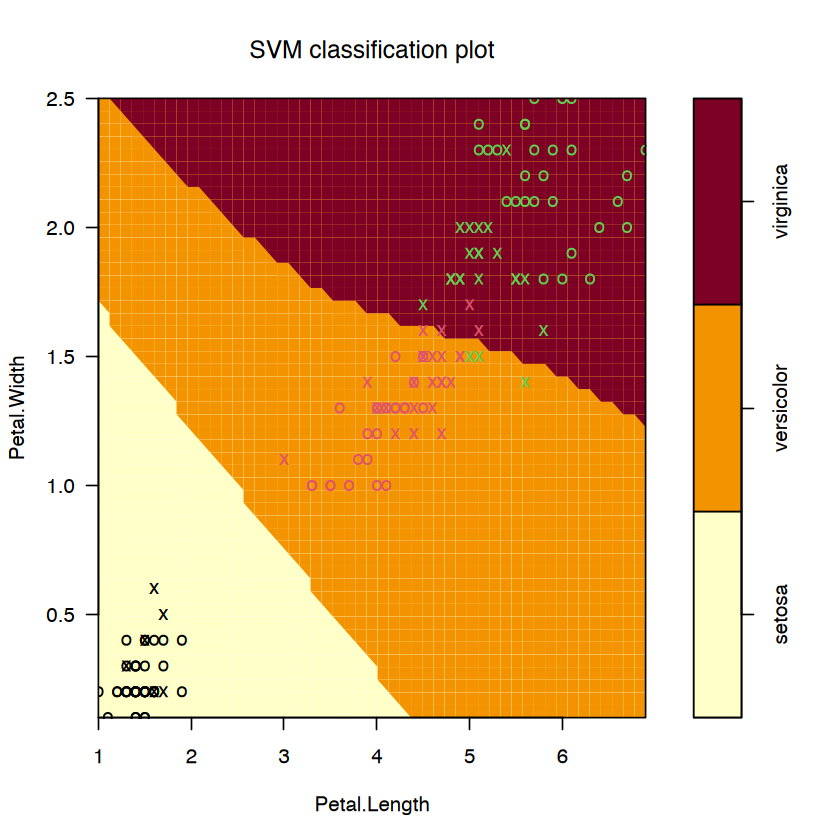

In [20]:
plot(model_ploy, data = iris, formula = Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))

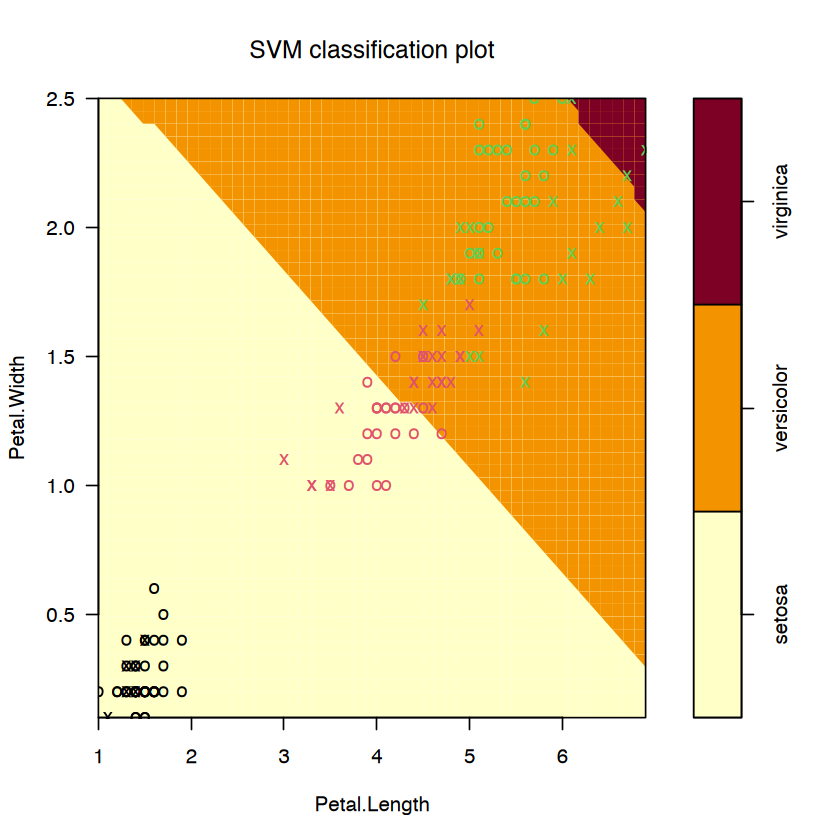

In [21]:
plot(model_sig, data = iris, formula = Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))

In [ ]:
set.seed(123)
tune_model <- tune.svm(
  Species ~ .,
  data = iris,
  cost = 10^(-1:3),         # 设置cost的值
  gamma = 10^(-3:1),        # 设置gamma的值
  tunecontrol = tune.control(
    sampling = "bootstrap", # 重抽样方法选择自助法
    nboot = 100             # 次数选择100次
  )
)

tune_model


Parameter tuning of 'svm':

- sampling method: bootstrapping 

- best parameters:
 gamma cost
  0.01  100

- best performance: 0.03924088 


In [23]:
model_final <- svm(Species ~ ., data = iris, cost=100, gamma=0.01)
print(model_final)


Call:
svm(formula = Species ~ ., data = iris, cost = 100, gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  24



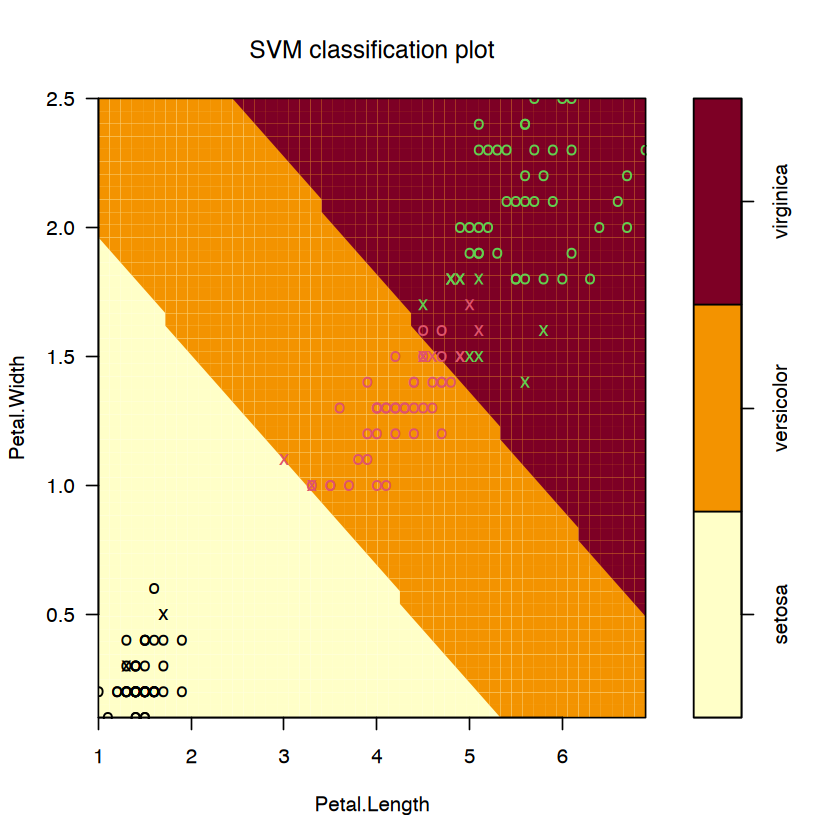

In [24]:
plot(model_final, data = iris, formula = Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))